<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter10/Human_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Pose Detection
in this notebook we'll load a pretrained detectron model for human pose detection and do inference only.

In [1]:
# Uncomment the following if packages are not yet installed
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# !pip install torch_snippets
# !pip install pyyaml==5.1 pycocotools>=2.0.1

from torch_snippets import *
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

As we've seen in previous notebook, we need to configure the detecton model.
we start with a fresh new config and then update the relevant parameter from the model's yaml

In [2]:
cfg = get_cfg() # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))

In [6]:
cfg.keys()

dict_keys(['VERSION', 'MODEL', 'INPUT', 'DATASETS', 'DATALOADER', 'SOLVER', 'TEST', 'OUTPUT_DIR', 'SEED', 'CUDNN_BENCHMARK', 'VIS_PERIOD', 'GLOBAL'])

In [12]:
cfg.MODEL.WEIGHTS

'https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'

In [11]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_a6e10b.pkl: 237MB [00:13, 18.2MB/s]                              


In [14]:
# Load an image we want to run the model on
from torch_snippets import read, resize
# !wget -q https://i.imgur.com/ldzGSHk.jpg -O image.png
im = read('image.png',1)
im = resize(im, 0.5) # resize image to half its dimensions

/home/guy/anaconda3/envs/ptvit/lib/python3.8/site-packages/torch-1.10.1-py3.8-linux-x86_64.egg/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/guy/anaconda3/envs/ptvit/lib/python3.8/site-packages/detectron2/structures/keypoints.py:224: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_int = (pos - x_int) // w


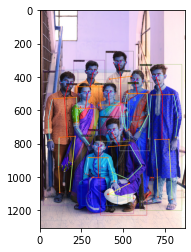

In [15]:
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(out.get_image())